# Preamble
I use this for prototyping plots and other features.

In [13]:
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})
import pandas as pd
import matplotlib.pyplot as plt




In [25]:
df = pd.read_csv("output\INS\clinvar_seqMUT_scores.csv")


In [16]:
df["ClinicalSignificance"].unique()
df.columns

Index(['data', 'ClinicalSignificance', 'PhenotypeIDS', 'PhenotypeList', 'Type',
       'HGNC_ID', 'WTpSeq', 'WTcSeq', 'Mutation', 'MUTpSeq', 'comparison',
       'chain1', 'chain2', 'chain1_length', 'chain2_length', 'aligned_length',
       'rmsd', 'identical/aligned'],
      dtype='object')

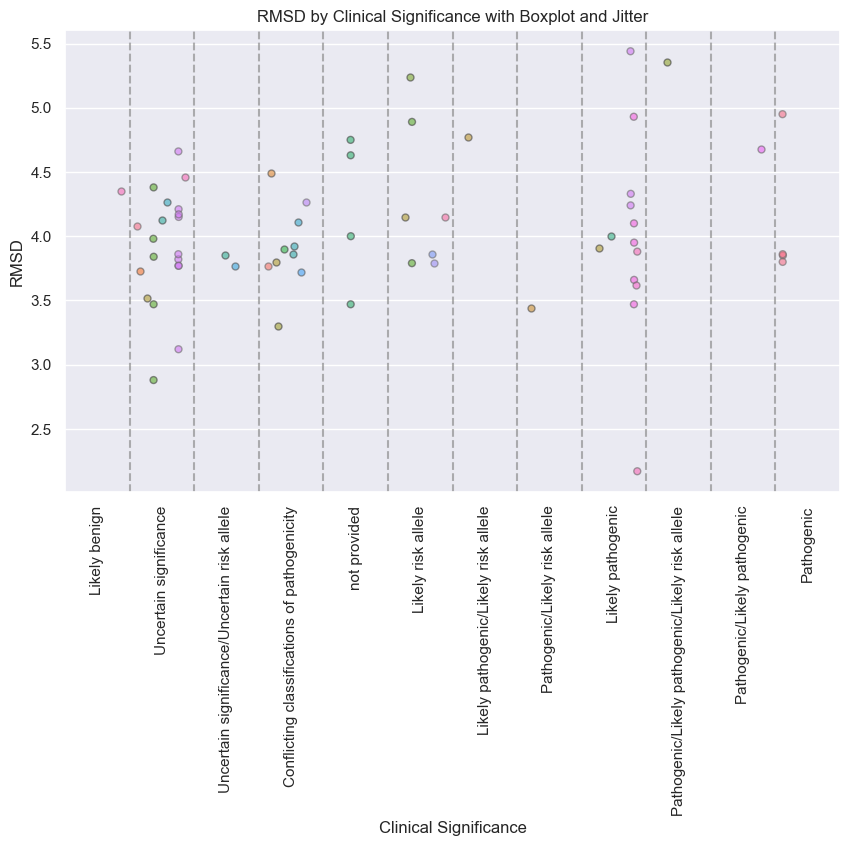

In [30]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Define the correct order for ClinicalSignificance
order = [
    'Likely benign',
    'Uncertain significance',
    'Uncertain significance/Uncertain risk allele',
    'Conflicting classifications of pathogenicity',
    'not provided',
    'Likely risk allele',
    'Likely pathogenic/Likely risk allele',
    'Pathogenic/Likely risk allele',
    'Likely pathogenic',
    'Pathogenic/Likely pathogenic/Likely risk allele',
    'Pathogenic/Likely pathogenic',
    'Pathogenic',
]

# Convert ClinicalSignificance to a categorical type with the correct order
df['ClinicalSignificance'] = pd.Categorical(df['ClinicalSignificance'], categories=order, ordered=True)

# Create the figure and axis
plt.figure(figsize=(10, 6))


# Overlay the stripplot (scatter with jitter)
sns.stripplot(
    y="rmsd", 
    x="ClinicalSignificance", 
    data=df, 
    jitter=True,  # Add jitter for horizontal wiggle
    dodge=True,   # Spread overlapping points
    alpha=0.6,    # Make points slightly transparent for better visibility
    linewidth=1,  # Add border to points
    order=order,
    hue="PhenotypeList"

)

# Add vertical lines to separate categories
for i in range(1, len(order)):
    plt.axvline(i - 0.5, color='gray', linestyle='--', alpha=0.6)

# Rotate the x-axis labels vertically
plt.xticks(rotation=90)

# Add labels and title
plt.xlabel('Clinical Significance')
plt.ylabel('RMSD')
plt.title('RMSD by Clinical Significance with Boxplot and Jitter')
plt.legend()
plt.legend([],[], frameon=False)



In [27]:
import plotly.express as px
import pandas as pd


# Define the correct order for ClinicalSignificance
order = [
    'Likely benign',
    'Uncertain significance',
    'Uncertain significance/Uncertain risk allele',
    'Conflicting classifications of pathogenicity',
    'not provided',
    'Likely risk allele',
    'Likely pathogenic/Likely risk allele',
    'Pathogenic/Likely risk allele',
    'Likely pathogenic',
    'Pathogenic/Likely pathogenic/Likely risk allele',
    'Pathogenic/Likely pathogenic',
    'Pathogenic',
]

# Create the interactive scatter plot
fig = px.strip(df, 
               x='ClinicalSignificance', 
               y='rmsd', 
               category_orders={'ClinicalSignificance': order},
               title="RMSD vs Clinical Significance",
               #jitter=True,  # Add horizontal jitter
               )

# Show the interactive plot
fig.show()

# To save as HTML
#fig.write_html("interactive_plot.html")


TypeError: strip() got an unexpected keyword argument 'hue'

In [96]:
import pandas as pd
import plotly.express as px


df = pd.read_csv("output\INS\clinvar_seqMUT_scores.csv")

metric = "rmsd"
if metric == "identical_v_aligned":
    metric = "identical/aligned"

# Define the correct order for ClinicalSignificance
order = [
    'Likely benign',
    'Uncertain significance',
    'Uncertain significance/Uncertain risk allele',
    'Conflicting classifications of pathogenicity',
    'not provided',
    'Likely risk allele',
    'Likely pathogenic/Likely risk allele',
    'Pathogenic/Likely risk allele',
    'Likely pathogenic',
    'Pathogenic/Likely pathogenic/Likely risk allele',
    'Pathogenic/Likely pathogenic',
    'Pathogenic',
]

# Convert ClinicalSignificance to a categorical type with the correct order
df['ClinicalSignificance'] = pd.Categorical(df['ClinicalSignificance'], categories=order, ordered=True)

# Create hover text that includes useful information (customize as needed)
df['hover_text'] = df['data'] +"<br>" + df['PhenotypeList'] + '<br>' + df[metric].astype(str) + ' ' + metric
df['url'] = "isoform.html?" + df['data']

# Create the interactive plot using Plotly Express
fig = px.strip(df,
                x="ClinicalSignificance",
                y=metric,
                hover_name="hover_text",  # Display hover information
                #hover_data=["PhenotypeList", metric],  # Other hover data
                color="PhenotypeList",  # Color points based on the phenotype
                category_orders={"ClinicalSignificance": order},  # Set category order
                #stripmode="overlay",  # Overlay scatter points
                )


# Add vertical lines to separate categories
for i in range(1, len(order)):
    fig.add_vline(x=i - 0.5, line_width=1, line_dash="dash", line_color="gray")

# Customize the layout of the plot
fig.update_layout(
    xaxis_title='Clinical Significance',
    yaxis_title=metric,
    title=f"INS - {metric} vs. Clinical Significance",
    xaxis={'categoryorder': 'array', 'categoryarray': order},
    template='plotly_white',
    showlegend=False  # This removes the legend
)
fig.layout.xaxis.fixedrange = True
fig.layout.yaxis.fixedrange = True

# Customize the hover text with hovertemplate and make the URL clickable
fig.update_traces(
    marker=dict(size=10),
    customdata=df['url'],  # Use the 'url' column from the dataframe for redirection
    hovertemplate=(
        "%{hovertext}<br>"  # Display the hover_text column
        #"Clinical Significance: %{x}<br>"  # Show the x-axis value (Clinical Significance)
        #f"{metric.capitalize()}: %{y}<br>"  # Show the y-axis value (RMSD or other metric)
        "<extra></extra>"  # Remove default extra info
    )
)


fig.write_html("test.html", include_plotlyjs='cdn', full_html=False, div_id='plotly_graph')
with open("test.html", 'a') as f:
    f.write('''<script>
    var plot = document.querySelectorAll('.js-plotly-plot')[0];  // Get the first Plotly plot
    plot.on('plotly_click', function(data) {
        var point = data.points[0];
        var url = point.customdata;  // customdata contains the URL
        window.open(url, "_blank");  // Opens the link in a new tab
    });
    </script>
    ''')

In [82]:
fig.write_html("test.html", include_plotlyjs='cdn')
with open("test.html", 'a') as f:
    f.write('''<script>
    var plot = document.getElementById('plotly-graph');  // Assuming the div ID in your plotly html is 'plotly-graph'
    plot.on('plotly_click', function(data){
        var point = data.points[0];
        var url = point.customdata;  // customdata contains the URL
        window.open(url, "_blank");  // Opens the link in a new tab
    });
    </script>
    ''')

# networks

In [35]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Load the CSV into a DataFrame
df = pd.read_csv("output/INS/network.csv")

# Initialize a graph object
G = nx.Graph()

# Add edges to the graph from the CSV (edges weighted by RMSD)
for _, row in df.iterrows():
    protein1 = row['Protein1']
    protein2 = row['Protein2']
    rmsd = row['RMSD']
    
    # Add edge to the graph with RMSD as the weight
    G.add_node(protein1,name=protein1)
    G.add_node(protein2,name=protein2)
    G.add_edge(protein1, protein2, weight=rmsd)

# Check the graph
print(f"Nodes: {G.nodes()}")
print(f"Edges: {G.edges(data=True)}")


Nodes: [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0]
Edges: [(0.0, 1.0, {'weight': 4.08}), (0.0, 2.0, {'weight': 4.93}), (0.0, 3.0, {'weight': 3.47}), (0.0, 4.0, {'weight': 4.24}), (0.0, 5.0, {'weight': 4.15}), (0.0, 6.0, {'weight': 4.75}), (0.0, 7.0, {'weight': 3.91}), (0.0, 8.0, {'weight': 3.8}), (0.0, 9.0, {'weight': 5.24}), (0.0, 10.0, {'weight': 3.92}), (0.0, 11.0, {'weight': 2.17}), (0.0, 12.0, {'weight': 3.3}), (0.0, 13.0, {'weight': 4.38}), (0.0, 14.0, {'weight': 4.95}), (0.0, 15.0, {'weight': 4.77}), (0.0, 16.0, {'weight': 3.85}), (0.0, 17.0, {'weight': 3.52}), (0.0, 18.0, {'weight': 3.62}), (0.0, 19.0, {'weight': 3.86}), (0.0, 20.0, {'weight

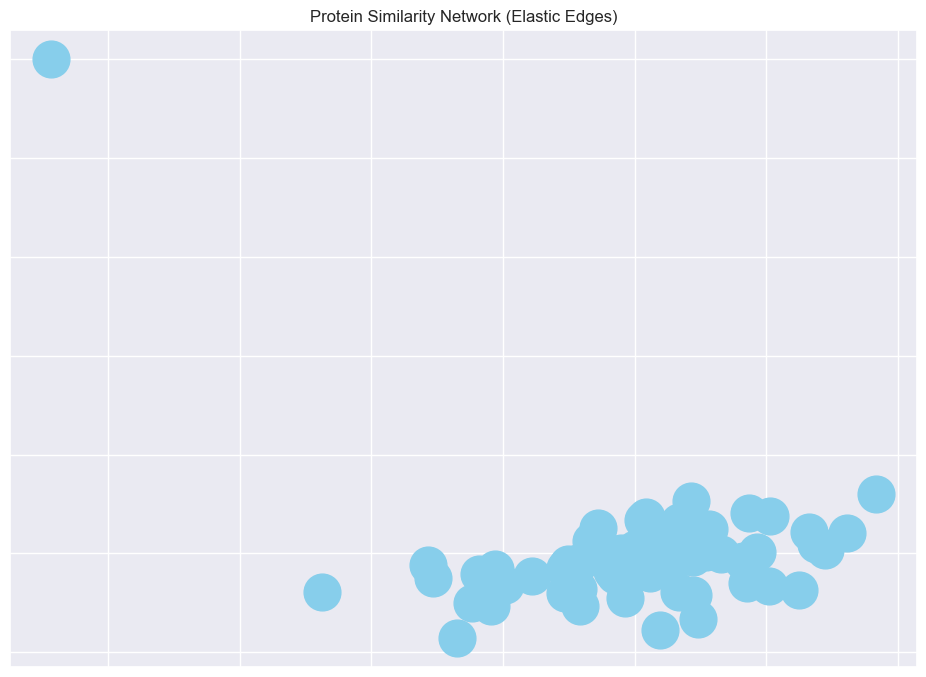

In [47]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Load the CSV into a DataFrame
df = pd.read_csv("output/INS/network.csv")

# Initialize a graph object
G = nx.Graph()

# Add edges to the graph from the CSV (edges weighted by RMSD)
for _, row in df.iterrows():
    protein1 = row['Protein1']
    protein2 = row['Protein2']
    rmsd = row['RMSD']
    
    # Add edge to the graph with RMSD as the weight
    G.add_edge(protein1, protein2, weight=rmsd)

# Apply the spring layout (elasticity based on RMSD)
# Use the inverse of RMSD as the weight so lower RMSD (more similar) means closer nodes
pos = nx.spring_layout(G, weight='weight', scale=100, iterations=100, k=1/len(G.nodes()))

# Draw the nodes
nx.draw_networkx_nodes(G, pos, node_size=700, node_color='skyblue')

# Draw the edges with weights (elastic edges based on RMSD)
#edges = nx.draw_networkx_edges(G, pos, width=2, edge_color='gray')

# Draw the labels (node names)
#nx.draw_networkx_labels(G, pos, font_size=10)

# Display edge weights (RMSD)
edge_labels = nx.get_edge_attributes(G, 'weight')
#nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

# Show the plot
plt.title("Protein Similarity Network (Elastic Edges)")
plt.show()


In [48]:
import pandas as pd
import networkx as nx
import plotly.graph_objs as go

# Load the CSV into a DataFrame
df = pd.read_csv("output/INS/network.csv")

# Initialize a graph object
G = nx.Graph()

# Add edges to the graph from the CSV (edges weighted by RMSD)
for _, row in df.iterrows():
    protein1 = row['Protein1']
    protein2 = row['Protein2']
    rmsd = row['RMSD']
    
    # Add edge to the graph with RMSD as the weight
    G.add_edge(protein1, protein2, weight=rmsd)

# Apply the spring layout (elasticity based on RMSD)
# Using inverse RMSD so that lower values pull nodes closer together
pos = nx.spring_layout(G, weight='weight', scale=100)

# Extract node positions for Plotly
node_x = [pos[n][0] for n in G.nodes()]
node_y = [pos[n][1] for n in G.nodes()]
node_labels = list(G.nodes())

# Extract edge positions
edge_x = []
edge_y = []
for edge in G.edges():
    x0, y0 = pos[edge[0]]
    x1, y1 = pos[edge[1]]
    edge_x.append(x0)
    edge_x.append(x1)
    edge_x.append(None)  # This is used to create a "break" between edges
    edge_y.append(y0)
    edge_y.append(y1)
    edge_y.append(None)

# Create edge traces (lines between nodes)
edge_trace = go.Scatter(
    x=edge_x, y=edge_y,
    line=dict(width=0.5, color='#888'),
    hoverinfo='none',
    mode='lines'
)

# Create node traces (points for the nodes)
node_trace = go.Scatter(
    x=node_x, y=node_y,
    mode='markers+text',
    hoverinfo='text',
    text=node_labels,
    marker=dict(
        showscale=True,
        colorscale='YlGnBu',
        size=10,
        colorbar=dict(
            thickness=15,
            title='Node Connections',
            xanchor='left',
            titleside='right'
        ),
    )
)

# Create the figure
fig = go.Figure(data=[edge_trace, node_trace])

# Update layout for better visualization
fig.update_layout(
    title="Protein Similarity Network (Elastic Edges)",
    showlegend=False,
    hovermode='closest',
    margin=dict(b=0, l=0, r=0, t=0),
    xaxis=dict(showgrid=False, zeroline=False),
    yaxis=dict(showgrid=False, zeroline=False)
)

# Show the interactive plot
fig.show()


# gene info

In [109]:
import time
import xmltodict

from collections import defaultdict

from Bio import Entrez

def get_entrez_gene_summary(
    gene_name, email, organism="human", max_gene_ids=100
):
    """Returns the 'Summary' contents for provided input
    gene from the Entrez Gene database. All gene IDs 
    returned for input gene_name will have their docsum
    summaries 'fetched'.
    
    Args:
        gene_name (string): Official (HGNC) gene name 
           (e.g., 'KAT2A')
        email (string): Required email for making requests
        organism (string, optional): defaults to human. 
           Filters results only to match organism. Set to None
           to return all organism unfiltered.
        max_gene_ids (int, optional): Sets the number of Gene
           ID results to return (absolute max allowed is 10K).
        
    Returns:
        dict: Summaries for all gene IDs associated with 
           gene_name (where: keys → [orgn][gene name],
                      values → gene summary)
    """
    Entrez.email = email

    query = (
        f"{gene_name}[Gene Name]"
        if not organism
        else f"({gene_name}[Gene Name]) AND {organism}[Organism]"
    )
    handle = Entrez.esearch(db="gene", term=query, retmax=max_gene_ids)
    record = Entrez.read(handle)
    handle.close()

    gene_summaries = defaultdict(dict)
    gene_ids = record["IdList"]

    print(
        f"{len(gene_ids)} gene IDs returned associated with gene {gene_name}."
    )
    for gene_id in gene_ids:
        print(f"\tRetrieving summary for {gene_id}...")
        handle = Entrez.efetch(db="gene", id=gene_id, rettype="docsum")
        gene_dict = xmltodict.parse(
            "".join([x.decode(encoding="utf-8") for x in handle.readlines()]),
            dict_constructor=dict,
        )
        gene_docsum = gene_dict["eSummaryResult"]["DocumentSummarySet"][
            "DocumentSummary"
        ]
        name = gene_docsum.get("Name")
        summary = gene_docsum.get("Summary")
        gene_organism = gene_docsum.get("Organism")["CommonName"]
        gene_summaries[gene_organism][name] = summary
        handle.close()
        time.sleep(0.34)  # Requests to NCBI are rate limited to 3 per second

    return gene_summaries['human']

email = "x"
gene_summaries = get_entrez_gene_summary("INS", email)


1 gene IDs returned associated with gene INS.
	Retrieving summary for 3630...
{'INS': "This gene encodes insulin, a peptide hormone that plays a vital role in the regulation of carbohydrate and lipid metabolism. After removal of the precursor signal peptide, proinsulin is post-translationally cleaved into three peptides: the B chain and A chain peptides, which are covalently linked via two disulfide bonds to form insulin, and C-peptide. Binding of insulin to the insulin receptor (INSR) stimulates glucose uptake. A multitude of mutant alleles with phenotypic effects have been identified, including insulin-dependent diabetes mellitus, permanent neonatal diabetes diabetes mellitus, maturity-onset diabetes of the young type 10 and hyperproinsulinemia. There is a read-through gene, INS-IGF2, which overlaps with this gene at the 5' region and with the IGF2 gene at the 3' region. [provided by RefSeq, May 2020]"}


In [106]:
!pip install xmltodict

In [ ]:
!pip

# Averaging PDB files


## rotating to match the first

In [25]:
from biopandas.pdb import PandasPdb
from Bio.PDB import Superimposer, PDBParser, PDBIO
from glob import glob
from tqdm import tqdm
import numpy as np

# Load the proteins
proteins = glob("output\\ADM\\NM_001124.3_ADM_c.218T-G_p.Met73Arg\\isoform_relaxed_rank_*_alphafold2_ptm_model_*_seed_000.pdb")
# Biopython PDB parser
parser = PDBParser(QUIET=True)

# Select a reference structure (use the first protein as reference)
reference_file = proteins[0]
reference_structure = parser.get_structure("reference", reference_file)

# Extract the CA atoms from the reference structure
ref_atoms = [atom for atom in reference_structure.get_atoms() if atom.id == 'CA']

# Initialize Superimposer from Biopython
sup = Superimposer()

# Iterate over the proteins and superimpose each on the reference
for protein_file in tqdm(proteins):
    a,b,c,d= protein_file.split("\\")[:]
    rank = d.split("rank_")[1].split("_")[0]
    newFile  = f"{a}\\{b}\\{c}\\isoform_relaxed_rank_{rank}_rotated.pdb"
    target_structure = parser.get_structure("target", protein_file)
    
    # Extract the CA atoms from the target structure
    target_atoms = [atom for atom in target_structure.get_atoms() if atom.id == 'CA']
    
    # Ensure both structures have the same number of CA atoms
    if len(ref_atoms) == len(target_atoms):
        # Superimpose the target on the reference
        sup.set_atoms(ref_atoms, target_atoms)
        sup.apply(target_structure.get_atoms())  # Apply rotation and translation to all atoms
        
        # Save the aligned structure
        io = PDBIO()
        io.set_structure(target_structure)
        io.save(newFile)
    else:
        print(f"Skipping {protein_file} due to mismatched atom counts.")



100%|██████████| 5/5 [00:00<00:00,  6.12it/s]


In [48]:
from Bio.PDB import PDBParser, Superimposer, PDBIO, Select
import pandas as pd
pdbFiles = glob("output\\ADM\\NM_001124.3_ADM_c.218T-G_p.Met73Arg\\isoform_relaxed_rank_*rotated.pdb")
pdbs = [PandasPdb().read_pdb(i) for i in tqdm(pdbFiles)]#
new = pdbs[0].df["ATOM"].copy()

for col in ["x_coord", "y_coord", "z_coord","b_factor"]:
    new[col] = sum([i.df['ATOM'][col] for i in pdbs])/len(pdbs)
pdb = PandasPdb().read_pdb(pdbFiles[0])
pdb.df["ATOM"] = new
pdb.to_pdb('test.pdb') 


100%|██████████| 5/5 [00:00<00:00, 10.50it/s]


# plddt plots

In [4]:
from glob import glob
import re 
pattern = r'output\\(?P<gene>[^\\]+)\\(?P<allele>[^\\]+)\\isoform_scores_rank_001_alphafold2_ptm_model_1_seed_(?P<seed>\d+)\.json'


paths = {}
for path in glob("output/*/*/isoform_scores_rank_001_alphafold2_ptm_model_1_seed_*.json"):
    match = re.search(pattern, path)
    if match:
        gene,allele,seed = match.group('gene'), match.group('allele'), match.group('seed')
        if not (gene,allele) in paths:
            paths[(gene,allele)] = []
        paths[(gene,allele)].append(seed)
{k:len(v) for k,v in paths.items() if len(v) >= 5}

{('ADM', 'canonical'): 5,
 ('ADM', 'NM_001124.3_ADM_c.218T-G_p.Met73Arg'): 5,
 ('ADM', 'NM_001124.3_ADM_c.236G-A_p.Ser79Asn'): 5,
 ('ADM', 'NM_001124.3_ADM_c.520C-T_p.Pro174Ser'): 5,
 ('INS', 'NM_000207.3_INS_c.115C-T_p.Leu39Phe'): 5,
 ('INS', 'NM_000207.3_INS_c.277G-A_p.Glu93Lys'): 5}

<Axes: >

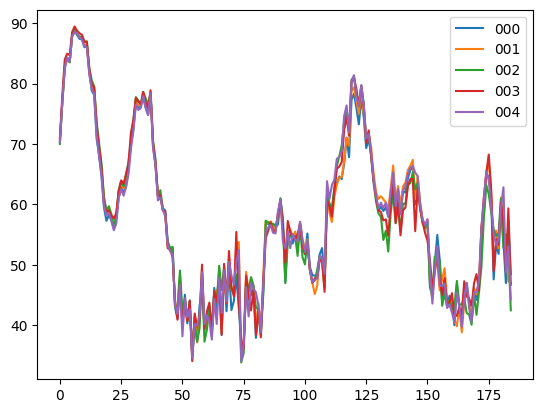

In [5]:
import json
import pandas as pd
gene = "ADM"
allele = "canonical"
metric = "plddt"
seeds = paths[(gene,allele)]

df = pd.DataFrame({i:json.loads(open(f"output/{gene}/{allele}/isoform_scores_rank_001_alphafold2_ptm_model_1_seed_{i}.json").read())[metric] for i in seeds})
df.plot()

In [27]:
import json
import pandas as pd
import plotly.graph_objects as go
from Bio import SeqIO
from Bio.SeqUtils import seq3  # To convert amino acid to three-letter codes

# Define variables
gene = "ADM"
allele = "NM_001124.3_ADM_c.112G-T_p.Ala38Ser"
metric = "plddt"
seeds = paths[(gene, allele)]

# Load data from JSON files and create a DataFrame
df = pd.DataFrame({i: json.loads(open(f"output/{gene}/{allele}/isoform_scores_rank_001_alphafold2_ptm_model_1_seed_{i}.json").read())[metric] for i in seeds})

# Calculate the average across all seeds
df['average'] = df.mean(axis=1)

# Parse the FASTA file to get the amino acid sequence
fasta_file = f"output/{gene}/{allele}/seq.fa"
sequence = ""
for record in SeqIO.parse(fasta_file, "fasta"):
    sequence = str(record.seq)

# Ensure the sequence length matches the DataFrame length
if len(sequence) != len(df):
    raise ValueError("The length of the amino acid sequence and the DataFrame rows do not match!")

# Convert the single-letter amino acid code to the three-letter code
three_letter_sequence = [seq3(aa).capitalize() for aa in sequence]  # List of three-letter codes

# Use regex to extract the mutation position and amino acid change if present
mutation_match = re.search(r'p\.([A-Za-z]+)(\d+)([A-Za-z]+)', allele)

mutation_position = None
mutation_annotation = None
if mutation_match:
    original_aa, position, mutated_aa = mutation_match.groups()
    mutation_position = int(position)  # Mutation position as an integer
    mutation_annotation = f"{(original_aa)} to {(mutated_aa)}"  # Formatted annotation

# Create the Plotly plot
fig = go.Figure()

# Add a line for each seed (with x position in hover template)
for i in seeds:
    fig.add_trace(go.Scatter(
        x=df.index + 1,  # Adding 1 to match amino acid positions starting from 1
        y=df[i], 
        mode='lines', 
        name=f'{i}',
        #hovertemplate="%{i}: %{x}<br>Score: %{y}<extra></extra>",  # Display x position and y-value
    ))

# Add the average line (with amino acid and x position in hover template)
fig.add_trace(go.Scatter(
    x=df.index + 1,  # Adding 1 to match amino acid positions starting from 1
    y=df['average'], 
    mode='lines', 
    name='Average', 
    line=dict(color='firebrick', width=4),
    hovertemplate="<b>%{text}</b> : %{y}<extra></extra>",  # Custom hover with amino acid and position
    text=three_letter_sequence  # Three-letter amino acid code
))


# Add an annotation arrow for the mutation if applicable
if mutation_position:
    fig.add_annotation(
        x=mutation_position,  # X-coordinate is the mutation position
        y=df['average'].iloc[mutation_position - 1],  # Y-coordinate is the average score at mutation position
        text=mutation_annotation,  # Display the amino acid change
        showarrow=True,
        arrowhead=2,
        ax=0,  # X offset for the annotation arrow
        ay=-40,  # Y offset for the annotation arrow
        #bgcolor="green",
        #font=dict(color="black"),
    )


# Update layout to adjust hover mode and axes
fig.update_layout(
    title=f"{metric} scores for {gene} ({allele})",
    xaxis_title="Position",
    yaxis_title=f"{metric.capitalize()} Score",
    legend_title="Seed",
    hovermode="x unified",  # Unified hover mode to show all values at a given x position
)


# Show the plot
fig.show()

# To export the plot as an embeddable HTML file
#fig.write_html("plot.html")


In [24]:
# Use regex to extract the mutation position and amino acid change if present
mutation_match = re.search(r'p\.([A-Za-z]+)(\d+)([A-Za-z]+)', allele)

mutation_position = None
mutation_annotation = None
if mutation_match:
    original_aa, position, mutated_aa = mutation_match.groups()
    mutation_position = int(position)  # Mutation position as an integer
    mutation_annotation = f"{(original_aa)} to {(mutated_aa)}"  # Formatted annotation
original_aa, position, mutated_aa ,mutation_annotation

('Ala', '38', 'Ser', 'Ala to Ser')